# Implementing Particle Swarm Optimization For Mock Assessment Solution

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx

In [114]:
colnames = ['Node', 'Position1', 'Position2']
position_data = pd.read_csv('sub_data_file.csv', header=None, names=colnames, index_col=['Node']) # Reading and assigning the nodes as index, to remove redundancy
position_data.head()

,Position1,Position2
Node,,
1,4873.6,4886.7
2,-3295.7,-4330.5
3,-2407.1,4397.4
4,-1027.0,-4828.9
5,-4260.1,1838.4


## Plotting The points

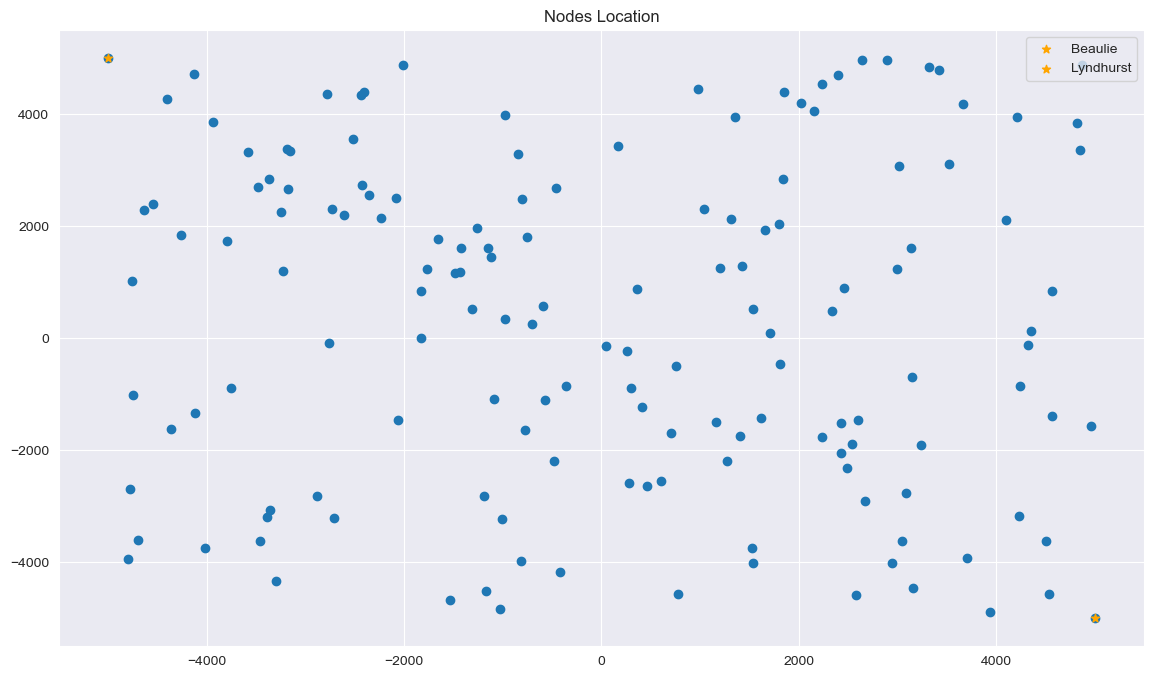

In [115]:
coordinate_x = position_data['Position1']
coordinate_y = position_data['Position2']

# Input Beaulieu and Lyndhurst coordinates
beaulie_coordinate = (5000, -5000)
lyndhurst_coordinate = (-5000, 5000)

plt.figure(figsize = (14, 8))
plt.title('Nodes Location')
plt.scatter(coordinate_x, coordinate_y)
plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
plt.legend(loc='upper right')
plt.show()

> We are Going to create a function to get the particle to reach a destination vertex either 151, or 152.

In [116]:
def calculate_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
distances = [] # List for appending in dataframe
for i in range(len(position_data)):
    for j in range(i + 1, len(position_data)):
        id1 = position_data.index[i]
        id2 = position_data.index[j]
        x1, y1 = position_data.iloc[i]['Position1'], position_data.iloc[i]['Position2']
        x2, y2 = position_data.iloc[j]['Position1'], position_data.iloc[j]['Position2']
        distance = calculate_distance(x1, x2, y1, y2)
        distances.append({"point1": id1, "point2": id2, "distance": distance})

distance_df = pd.DataFrame(distances)
print(f'There are total of {len(distance_df)} points.')
distance_df.loc[(distance_df['point1'] == 1)& (distance_df['point2'] == 141)]

There are total of 11476 points.


,point1,point2,distance
139,1,141,7623.831483


In [117]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = [7,5,4,3,2,1,0]
distance_df['transmission'] = pd.cut(distance_df['distance'], bins=bins, labels=labels, right=False)
distance_df.drop(distance_df.index[distance_df['transmission'] == 0], inplace=True)
distance_df.head()

,point1,point2,distance,transmission
6,1,8,1034.795366,4
18,1,20,1552.523752,3
38,1,40,2232.795239,2
40,1,42,2475.977770,2
53,1,55,2932.511040,1


In [118]:
# Adding the graph data type for simplicity.
G = nx.Graph()
for _, row in distance_df.iterrows():
    G.add_edge(row['point1'], row['point2'], weight=row['transmission'])


In [119]:
print(f"Graph edges with weights: {list(G.edges(data=True))}")

Graph edges with weights: [(1.0, 8.0, {'weight': 4.0}), (1.0, 20.0, {'weight': 3.0}), (1.0, 40.0, {'weight': 2.0}), (1.0, 42.0, {'weight': 2.0}), (1.0, 55.0, {'weight': 1.0}), (1.0, 76.0, {'weight': 4.0}), (1.0, 86.0, {'weight': 1.0}), (1.0, 93.0, {'weight': 3.0}), (1.0, 94.0, {'weight': 2.0}), (1.0, 100.0, {'weight': 4.0}), (1.0, 114.0, {'weight': 4.0}), (1.0, 127.0, {'weight': 1.0}), (1.0, 133.0, {'weight': 1.0}), (1.0, 146.0, {'weight': 3.0}), (1.0, 150.0, {'weight': 1.0}), (8.0, 20.0, {'weight': 3.0}), (8.0, 40.0, {'weight': 2.0}), (8.0, 42.0, {'weight': 1.0}), (8.0, 55.0, {'weight': 1.0}), (8.0, 76.0, {'weight': 5.0}), (8.0, 86.0, {'weight': 1.0}), (8.0, 93.0, {'weight': 2.0}), (8.0, 94.0, {'weight': 4.0}), (8.0, 100.0, {'weight': 4.0}), (8.0, 114.0, {'weight': 3.0}), (8.0, 127.0, {'weight': 1.0}), (8.0, 133.0, {'weight': 3.0}), (8.0, 136.0, {'weight': 1.0}), (8.0, 146.0, {'weight': 7.0}), (8.0, 150.0, {'weight': 3.0}), (20.0, 6.0, {'weight': 2.0}), (20.0, 17.0, {'weight': 3.0}), 

> Some important functions to check path validity

In [120]:
# Function to check valid paths
# Should remove the ones with zero weights just to make sure the path is valid at all points.
# Don't think we will be using this function anymore because have already removed all zeros transmissions
def is_valid_path(path, graph):
    for i in range(len(path) - 1):
        if not graph.has_edge(path[i], path[i + 1]):
            return False
    return True

In [121]:
G.nodes()

NodeView((1.0, 8.0, 20.0, 40.0, 42.0, 55.0, 76.0, 86.0, 93.0, 94.0, 100.0, 114.0, 127.0, 133.0, 146.0, 150.0, 2.0, 4.0, 11.0, 12.0, 13.0, 38.0, 47.0, 48.0, 67.0, 71.0, 75.0, 82.0, 83.0, 88.0, 128.0, 132.0, 137.0, 147.0, 3.0, 9.0, 22.0, 23.0, 24.0, 26.0, 33.0, 39.0, 44.0, 50.0, 51.0, 54.0, 56.0, 68.0, 69.0, 70.0, 80.0, 99.0, 104.0, 108.0, 110.0, 111.0, 119.0, 122.0, 123.0, 125.0, 126.0, 141.0, 142.0, 144.0, 152.0, 27.0, 66.0, 73.0, 78.0, 105.0, 140.0, 143.0, 5.0, 16.0, 31.0, 32.0, 34.0, 60.0, 63.0, 65.0, 102.0, 109.0, 117.0, 121.0, 6.0, 10.0, 17.0, 21.0, 29.0, 35.0, 52.0, 59.0, 85.0, 87.0, 96.0, 101.0, 106.0, 115.0, 134.0, 135.0, 136.0, 148.0, 7.0, 18.0, 19.0, 25.0, 30.0, 45.0, 46.0, 58.0, 64.0, 79.0, 89.0, 91.0, 95.0, 98.0, 107.0, 113.0, 116.0, 130.0, 138.0, 139.0, 92.0, 129.0, 149.0, 124.0, 131.0, 14.0, 15.0, 28.0, 49.0, 53.0, 57.0, 61.0, 62.0, 72.0, 77.0, 81.0, 84.0, 90.0, 97.0, 112.0, 145.0, 151.0, 41.0, 43.0, 103.0, 118.0, 37.0, 74.0, 120.0, 36.0))

In [186]:
import random
NUM_PARTICLES=1
def initialize_population_from_df(start_node, distance_df, max_length=6):
    """
    Generate population using valid connections from distance_df.
    """
    population = []
    retries = 0
    valid_edges = list(zip(distance_df['point1'], distance_df['point2']))
    graph = nx.Graph(valid_edges)  # Create a graph from the valid connections

    while len(population) < NUM_PARTICLES and retries < 10000:
        retries += 1
        path = [start_node]
        current_node = start_node

        # Randomly select nodes to form a path
        for _ in range(random.randint(1, max_length - 2)):  # Middle part length
            neighbors = list(graph.neighbors(current_node))
            if not neighbors:
                break  # No valid neighbors, stop path construction
            next_node = random.choice(neighbors)
            if next_node not in path:  # Avoid cycles
                path.append(next_node)
                current_node = next_node

        # Append valid end node
        end_node = random.choice([151, 152])
        if graph.has_edge(current_node, end_node):
            path.append(end_node)
            population.append(path)
            retries = 0  # Reset retries on success

    # Fallback: Print warning if retries exceeded
    if len(population) < NUM_PARTICLES:
        print(f"Warning: Could only generate {len(population)} valid paths after 100 retries.")
    return population
population = initialize_population_from_df(1, distance_df, max_length=20)
print(population[1])
print(len(population))

IndexError: list index out of range

In [187]:
def initialize_velocities(population):
    """
    Initialize velocities as a list of random swaps for each individual in the population.
    """
    velocities = []
    for individual in population:
        # Generate a random number of swaps for this individual
        num_swaps = random.randint(1, len(individual) - 2)  # Exclude start and end nodes
        swaps = [(random.randint(1, len(individual) - 2), random.randint(1, len(individual) - 2))
                 for _ in range(num_swaps)]
        velocities.append(swaps)
    return velocities

In [190]:
velocities = initialize_velocities(population)
print(population[0])
print(velocities[0])

[1, 20, 94, 115, 95, 65, 142, 125, 44, 23, 123, 3, 104, 152]
[(11, 6), (1, 5), (1, 9), (4, 11), (11, 5), (10, 5), (4, 1)]


In [202]:
def update_velocity(position, best_position, global_best_position, max_swaps=2):
    swaps = []
    for _ in range(max_swaps):
        if random.random() < 0.5:
            swaps.append(random_swap(position, best_position))
        else:
            swaps.append(random_swap(position, global_best_position))
    return swaps
def random_swap(position1, position2):
    common_nodes = set(position1) & set(position2)
    if not common_nodes:
        return random.sample(range(len(position1)), 2)
    ind1 = random.choice([i for i, node in enumerate(position1) if node in position2])
    ind2 = random.choice(range(len(position1)))
    return ind1, ind2

def apply_swaps(position, swaps, graph):
    """
    Apply swaps to a path and ensure the new position remains valid in the graph.
    Args:
        position: The current position (path).
        swaps: A list of swaps (pairs of indices).
        graph: The graph to check for valid edges.
    Returns:
        A valid new position.
    """
    new_position = position.copy()

    for i, j in swaps:
        # Apply the swap
        new_position[i], new_position[j] = new_position[j], new_position[i]

        # Check if the new path is valid
        if not is_valid_path(new_position, graph):
            # Revert the swap if invalid
            new_position[i], new_position[j] = new_position[j], new_position[i]

    return new_position

In [203]:
def fitness_function(path, graph, w_latency=1.0, w_rate=1.0):
    """
    Fitness function: Fixed latency (30) and bottleneck transmission rate.
    """
    total_latency = 30 * (len(path) - 1)  # Fixed latency between consecutive nodes
    min_transmission_rate = float('inf')

    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        if graph.has_edge(u, v):
            edge_data = graph[u][v]
            min_transmission_rate = min(min_transmission_rate, edge_data["weight"])
        else:
            return float('inf')  # Penalize invalid paths

    # Combine latency and transmission rate
    return w_latency * total_latency + w_rate / min_transmission_rate

In [204]:
fitness_function(population[0], G)

391.0

In [205]:
fitnesses = [fitness_function(path, G) for path in population]

In [206]:
min(fitnesses), max(fitnesses)

(391.0, 391.0)

In [210]:
def pso(graph, start_node, df, max_length=20, iterations=100, max_swaps=2):
    """
    Particle Swarm Optimization for pathfinding using valid connections from distance_df.
    """
    # Initialize population and velocities
    population = initialize_population_from_df(start_node, df, max_length=max_length)
    velocities = initialize_velocities(population)
    fitnesses = [fitness_function(path, graph) for path in population]

    # Initialize personal bests
    personal_best_positions = population.copy()
    personal_best_fitnesses = fitnesses.copy()

    # Initialize global best
    global_best_index = np.argmin(personal_best_fitnesses)
    global_best_position = personal_best_positions[global_best_index]
    global_best_fitness = personal_best_fitnesses[global_best_index]

    for iteration in range(iterations):
        for i in range(NUM_PARTICLES):
            # Update velocity using swaps targeting personal best and global best
            velocities[i] = update_velocity(population[i], personal_best_positions[i], global_best_position, max_swaps)

            # Apply swaps and validate path
            new_position = apply_swaps(population[i], velocities[i], graph)

            # Recalculate fitness
            new_fitness = fitness_function(new_position, graph)

            # Update personal best if improved
            if new_fitness < personal_best_fitnesses[i]:
                personal_best_fitnesses[i] = new_fitness
                personal_best_positions[i] = new_position

        # Update global best
        current_global_best_index = np.argmin(personal_best_fitnesses)
        if personal_best_fitnesses[current_global_best_index] < global_best_fitness:
            global_best_fitness = personal_best_fitnesses[current_global_best_index]
            global_best_position = personal_best_positions[current_global_best_index]

        # Print progress
        if iteration % 10 == 0 or iteration == iterations - 1:
            print(f"Iteration {iteration}: Global Best Fitness = {global_best_fitness}")
            print(f"Global Best Position: {global_best_position}")

    print("\nBest Path Found:", global_best_position)
    print("Best Fitness:", global_best_fitness)
pso(graph=G, start_node=1, df=distance_df, max_length=20, iterations=100, max_swaps=2)

Iteration 0: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 10: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 20: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 30: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 40: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 50: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 60: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 70: Global Best Fitness = 361.0
Global Best Position: [1, 42, 86, 150, 94, 21, 96, 87, 130, 39, 56, 60, 152]
Iteration 80: Global Best Fitness = 361.0
Global 

In [209]:
fitness_function([1, 150, 59, 94, 87, 43, 118, 28, 81, 105, 116, 115, 62, 61, 151],G)

421.0